In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
Comp=pd.read_csv("Downloads\\Company_Data.csv")
Comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
Comp2=Comp.iloc[:,0:6]
Comp2

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [4]:
Comp2.describe()

,Sales,CompPrice,Income,Advertising,Population,Price
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000


In [5]:
Comp2["Sales1"] = pd.cut(Comp["Sales"], bins = [0,7.50,17], labels = ["Low", "High"])
Comp2

,Sales,CompPrice,Income,Advertising,Population,Price,Sales1
0,9.50,138,73,11,276,120,High
1,11.22,111,48,16,260,83,High
2,10.06,113,35,10,269,80,High
3,7.40,117,100,4,466,97,Low
4,4.15,141,64,3,340,128,Low
...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,High
396,6.14,139,23,3,37,120,Low
397,7.41,162,26,12,368,159,Low
398,5.94,100,79,7,284,95,Low


In [6]:
Comp2['Sales1'].value_counts()

Low     201
High    198
Name: Sales1, dtype: int64

In [7]:
label_encoder=LabelEncoder()
(Comp2['Sales2'])=label_encoder.fit_transform(Comp2['Sales1'])

In [8]:
Comp2['Sales1']

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales1, Length: 400, dtype: category
Categories (2, object): ['Low' < 'High']

In [9]:
Comp2['Sales2']

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Sales2, Length: 400, dtype: int32

In [10]:
Comp2['Sales2'].value_counts()

1    201
0    198
2      1
Name: Sales2, dtype: int64

In [11]:
Comp2

,Sales,CompPrice,Income,Advertising,Population,Price,Sales1,Sales2
0,9.50,138,73,11,276,120,High,0
1,11.22,111,48,16,260,83,High,0
2,10.06,113,35,10,269,80,High,0
3,7.40,117,100,4,466,97,Low,1
4,4.15,141,64,3,340,128,Low,1
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,High,0
396,6.14,139,23,3,37,120,Low,1
397,7.41,162,26,12,368,159,Low,1
398,5.94,100,79,7,284,95,Low,1


In [12]:
x=Comp2.iloc[:,1:6]
y=Comp2['Sales2']

In [13]:
x

,CompPrice,Income,Advertising,Population,Price
0,138,73,11,276,120
1,111,48,16,260,83
2,113,35,10,269,80
3,117,100,4,466,97
4,141,64,3,340,128
...,...,...,...,...,...
395,138,108,17,203,128
396,139,23,3,37,120
397,162,26,12,368,159
398,100,79,7,284,95


In [14]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Sales2, Length: 400, dtype: int32

In [15]:
Comp2['Sales1'].unique()

['High', 'Low', NaN]
Categories (2, object): ['Low' < 'High']

In [16]:
colnames=list(Comp2.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Sales1',
 'Sales2']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [18]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(320, 5) (80, 5) (320,) (80,)


# USING ENTROPY CRITERIA

In [19]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

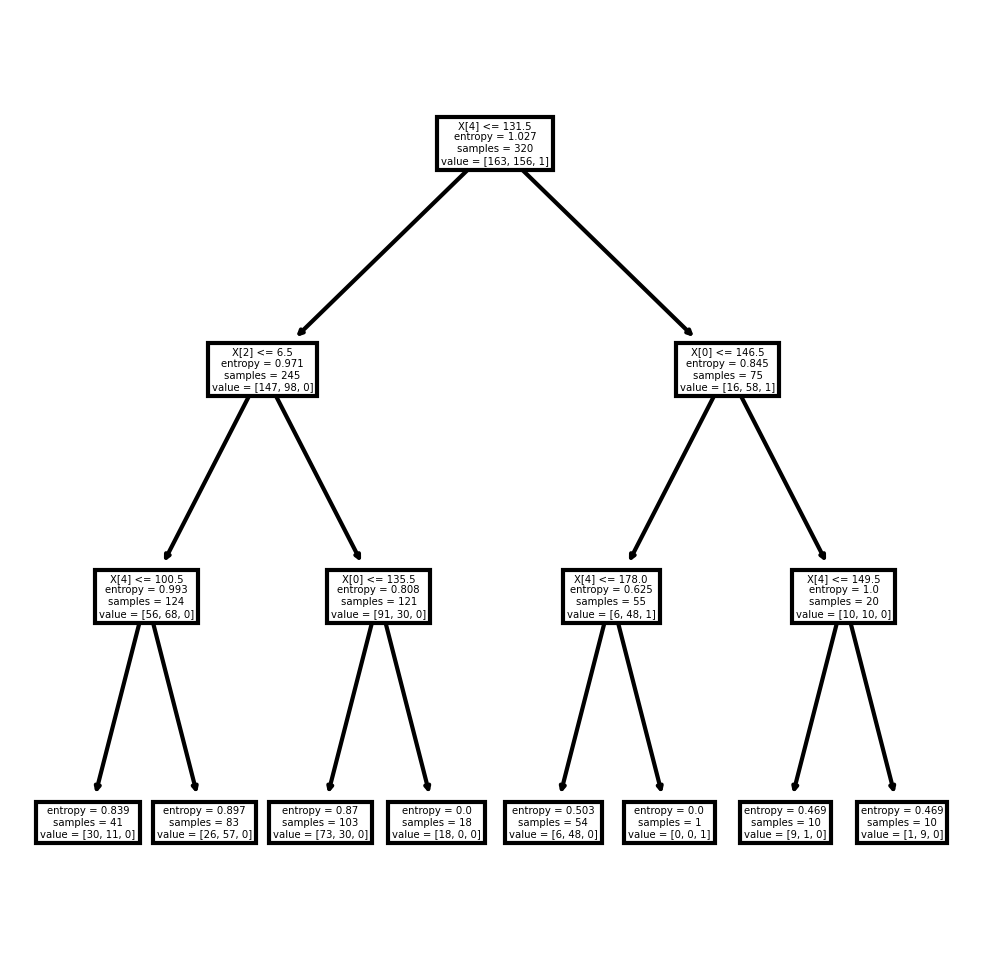

In [21]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model);

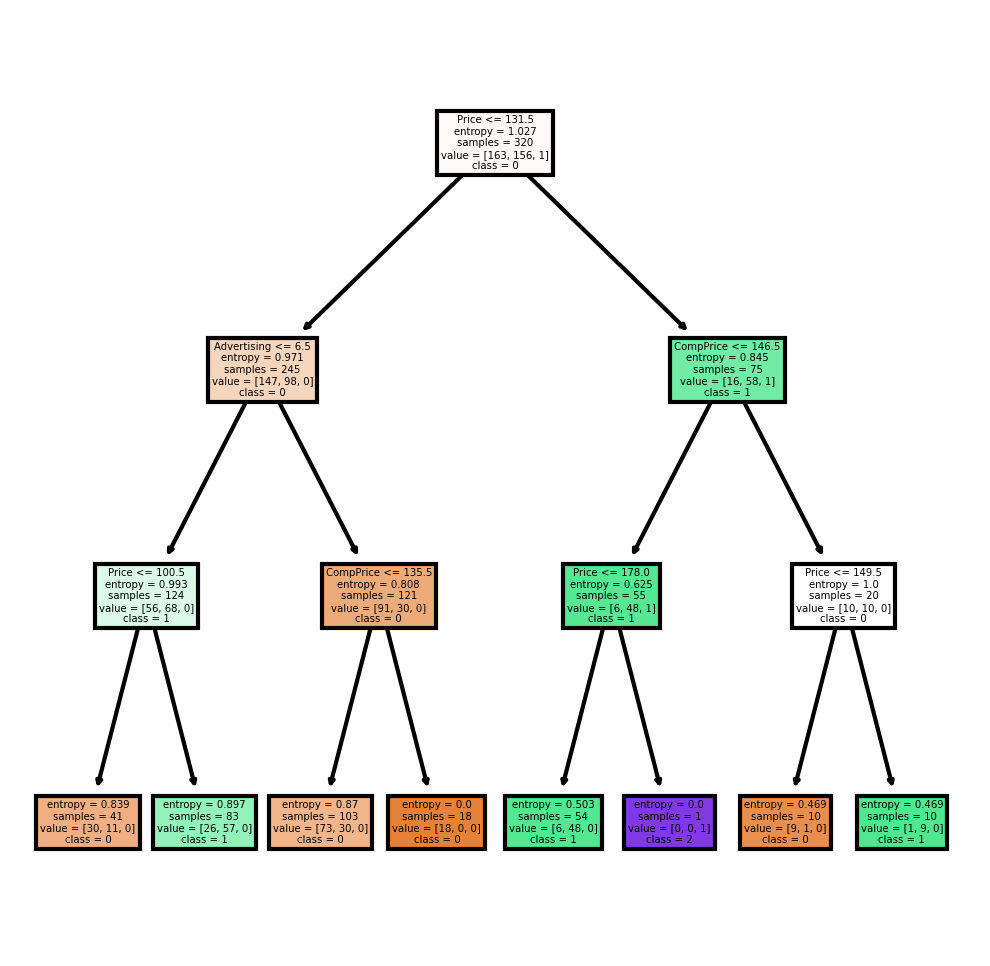

In [22]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price']
cn=['0','1','2']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [23]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

0    42
1    38
dtype: int64

In [24]:
preds

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [25]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales2,,
0,27,8
1,15,30


In [26]:
np.mean(preds==y_test)

0.7125

# USING GINI CRITERIA

In [27]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [28]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [29]:
preds=model_gini.predict(x_test)
pd.Series(preds).value_counts()


0    42
1    38
dtype: int64

In [30]:
preds

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [31]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales2,,
0,27,8
1,15,30


In [32]:
np.mean(preds==y_test)

0.7125

# DECISION TREE ON WHOLE DATA

In [33]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x,y)

DecisionTreeClassifier(max_depth=3)

In [34]:
preds=model_gini.predict(x)
pd.Series(preds).value_counts()


1    208
0    192
dtype: int64

In [35]:
preds

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,

In [36]:
pd.crosstab(y,preds)

col_0,0,1
Sales2,,
0,144,54
1,48,153
2,0,1


In [37]:
np.mean(preds==y)

0.7425